# Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, color
import imageio as iio
import cv2
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import cv2 as cv
from PIL import Image, ImageFilter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


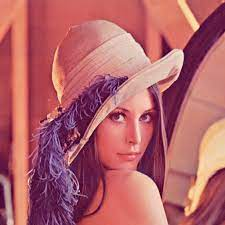

In [ ]:
# read an image
im1 = Image.open(r"/content/drive/MyDrive/Image processing/image1.jpg")
im1

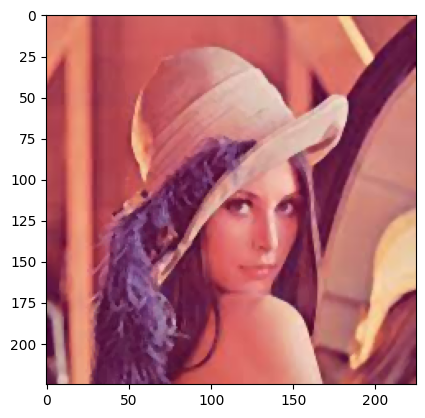

In [ ]:
# Median filter
im2 = im1.filter(ImageFilter.MedianFilter(size = 3))

plt.imshow(im2)
plt.show()

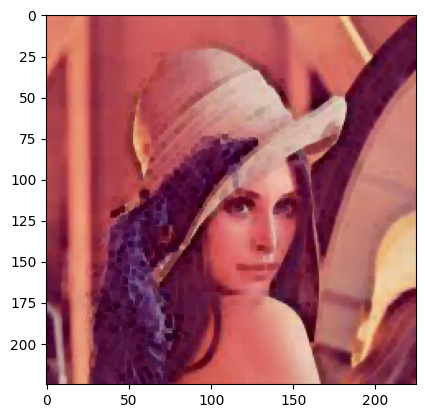

In [ ]:
# Min filter
im2 = im1.filter(ImageFilter.MinFilter(size = 3))

plt.imshow(im2)
plt.show()

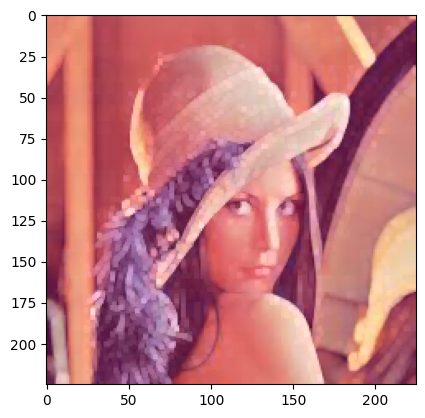

In [ ]:
# Max filter
im2 = im1.filter(ImageFilter.MaxFilter(size = 3))

plt.imshow(im2)
plt.show()

# Q2

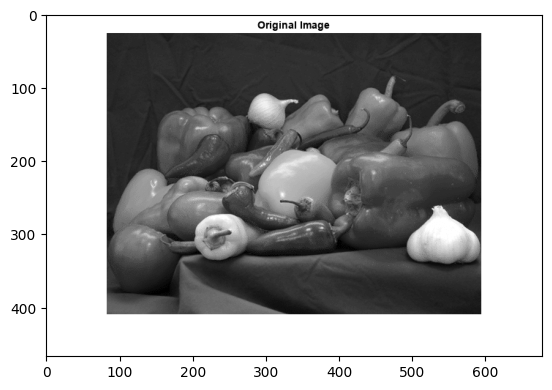

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Image processing/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Adjust the result to ensure pixel values are in the valid range
laplacian = np.uint8(np.absolute(laplacian))

# Combine with the original image to enhance details
alpha = 0.5  # Adjust the alpha value based on your preference
enhanced_image = cv2.addWeighted(image, 1, laplacian, alpha, 0)

# Display the original, Laplacian, and enhanced images
plt.imshow( image, cmap='gray')
# plt.imshow( laplacian, cmap='gray')
# plt.imshow(enhanced_image ,cmap='gray')
plt.show()

# Q3

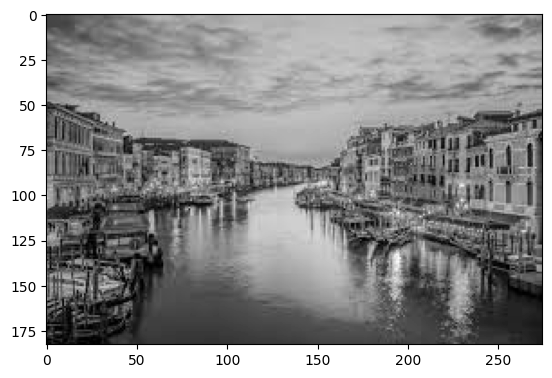

In [ ]:
# Load the image in grayscale image 3
image = cv2.imread('/content/drive/MyDrive/Image processing/image3.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow( image, cmap='gray')
plt.show()

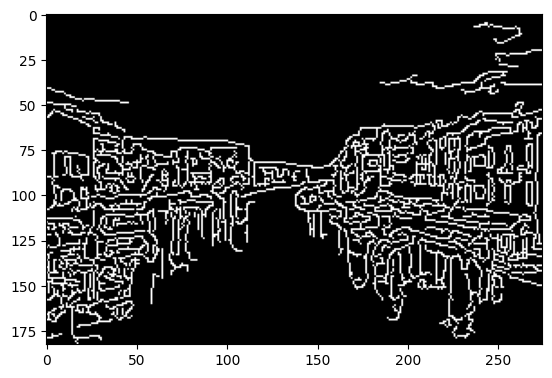

In [ ]:
# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply the Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

plt.imshow( edges, cmap='gray')
plt.show()

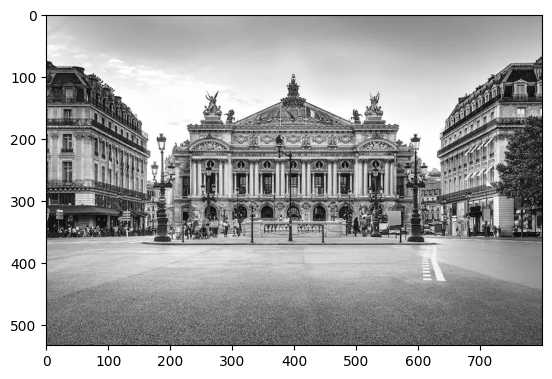

In [ ]:
# Load the image in grayscale image 4
image = cv2.imread('/content/drive/MyDrive/Image processing/image4.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow( image, cmap='gray')
plt.show()

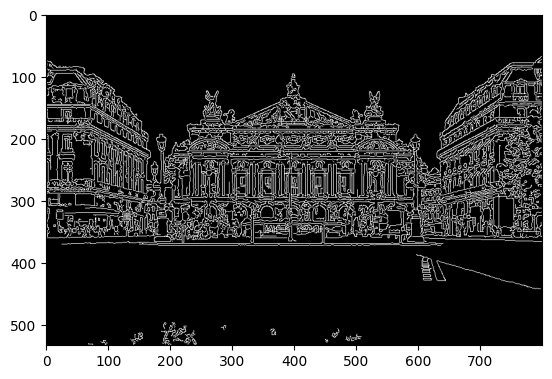

In [ ]:
# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply the Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

plt.imshow( edges, cmap='gray')
plt.show()

# Q4


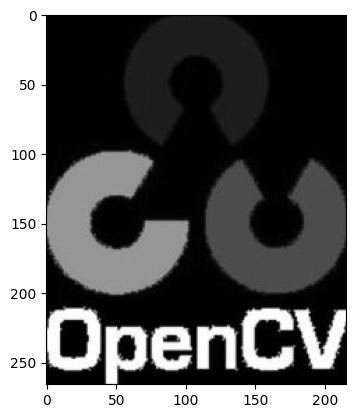

In [ ]:
# Load the image in grayscale image 4
image = cv2.imread('/content/drive/MyDrive/Image processing/image5.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow( image, cmap='gray')
plt.show()

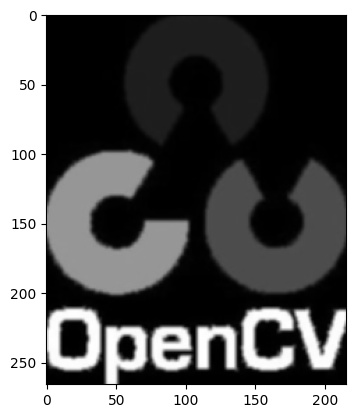

In [ ]:
# Apply 3x3 average filter
avg_3x3 = cv2.blur(image, (3, 3))
plt.imshow( avg_3x3, cmap='gray')

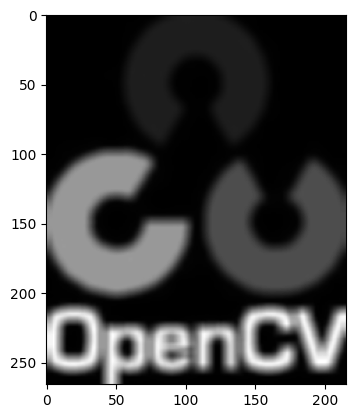

In [ ]:
# Apply 9x9 average filter
avg_9x9 = cv2.blur(image, (9, 9))
plt.imshow( avg_9x9, cmap='gray')

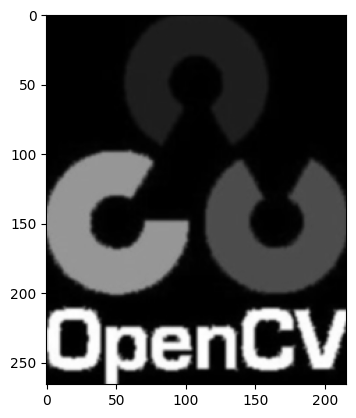

In [ ]:
# Apply 3x3 Gaussian filter
gas_3x3 = cv2.GaussianBlur(image, (3, 3), 0)
plt.imshow( gas_3x3, cmap='gray')

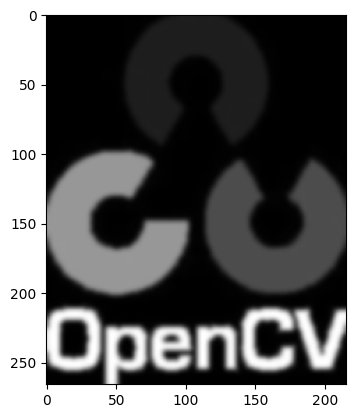

In [ ]:
# Apply 9x9 Gaussian filter
gas_9x9 = cv2.GaussianBlur(image, (9, 9), 0)
plt.imshow( gas_9x9, cmap='gray')

# Q5

In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.6 MB/s eta 0:00:00


In [ ]:
import imutils
import easyocr

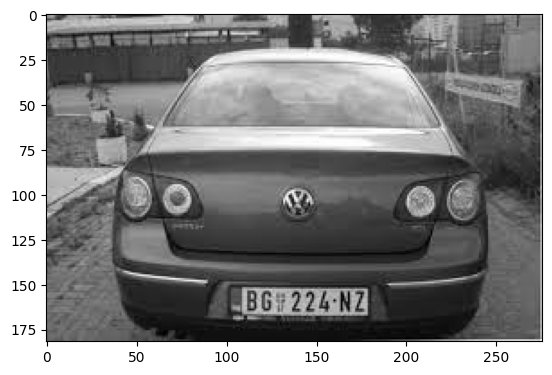

In [ ]:
# Read image and convert it to the gray scale
image_path  = '/content/drive/MyDrive/Image processing/image6.1.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

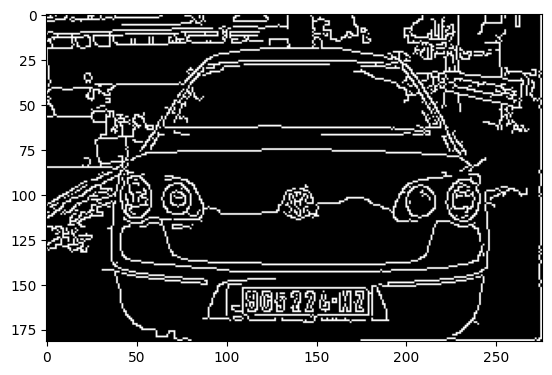

In [ ]:
# Find the edges with canny and plot it
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
# Plot the license
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)

NameError: ignored

In [ ]:
# Find the location of the license
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break

In [ ]:
location

array([[[ 96, 126]],

       [[176, 124]],

       [[177, 142]],

       [[ 97, 143]]], dtype=int32)

In [ ]:
# Mask the plane
mask = np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location], 0, 255, -1)
new_image= cv2.bitwise_and(image, image, mask=mask)

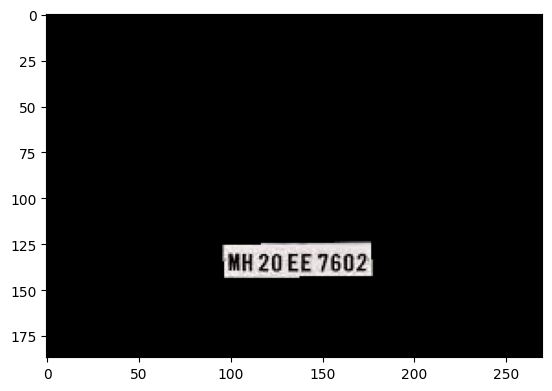

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Find the cordination of the license plane
(x, y) = np.where(mask ==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

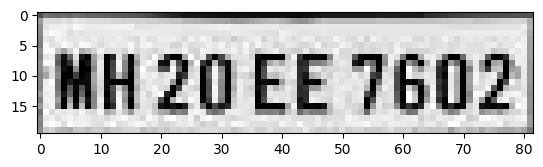

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Read the string license of plane
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[1, 5], [82, 5], [82, 20], [1, 20]], 'MH 20 EE 7602', 0.5255227150411979)]

In [ ]:
# Print the result
print("The license plane is: "+ result[0][-2])

The license plane is: MH 20 EE 7602


# Q6

In [ ]:
!pip install face-recognition

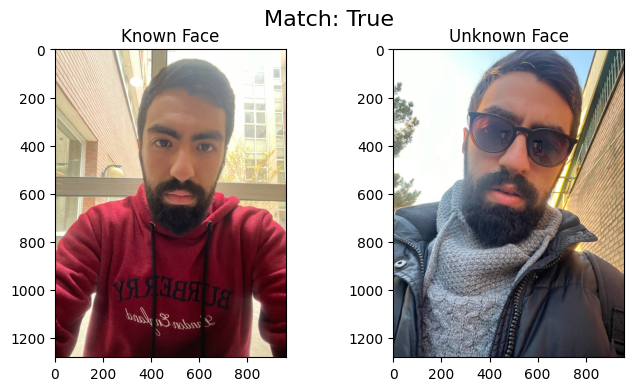

In [ ]:
import face_recognition as fr
known_image = fr.load_image_file("/content/drive/MyDrive/Image processing/face1.jpg")
unknown_image = fr.load_image_file("/content/drive/MyDrive/Image processing/face2.jpg")

biden_encoding = fr.face_encodings(known_image)[0]
unknown_encoding = fr.face_encodings(unknown_image)[0]

result = fr.compare_faces([biden_encoding], unknown_encoding)

# Plot images with result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot known face
ax1.imshow(known_image)
ax1.set_title('Known Face')

# Plot unknown face
ax2.imshow(unknown_image)
ax2.set_title('Unknown Face')

# Display the result
plt.suptitle(f"Match: {result[0]}", fontsize=16)
plt.show()

# Q7

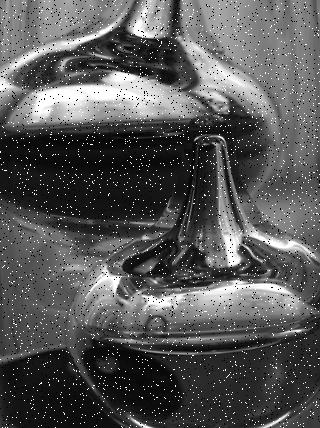

In [ ]:
# Reading image from drive
image = cv2.imread('/content/drive/MyDrive/Image processing/image7.jpg')
cv2_imshow(image)

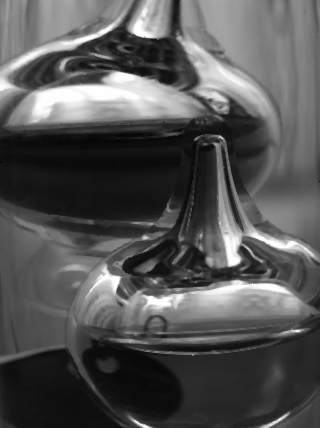

In [ ]:
# remove noise with median blur because it's a salt pepper noise
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.medianBlur(gray, 3)

cv2_imshow(filtered_image)

# Q8

In [ ]:
def image_sharper(image_path):

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Laplacian filter for edge enhancement
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharp_image = gray - laplacian

    # Clip negative values to ensure the result is in the valid range [0, 255]
    sharp_image = np.clip(sharp_image, 0, 255)

    # Convert the result back to 3 channels (RGB) if needed
    sharp_image_bgr = cv2.cvtColor(sharp_image.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Display the original and sharpened images
    cv2_imshow(image)
    cv2_imshow(sharp_image_bgr)

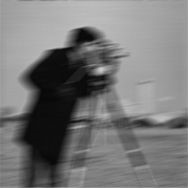

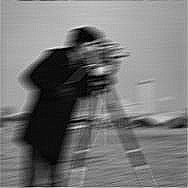

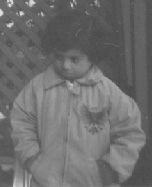

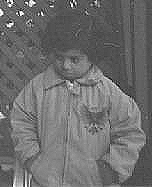

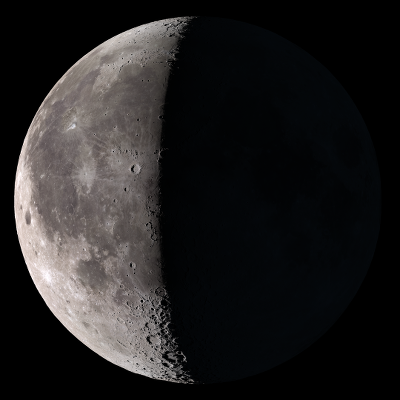

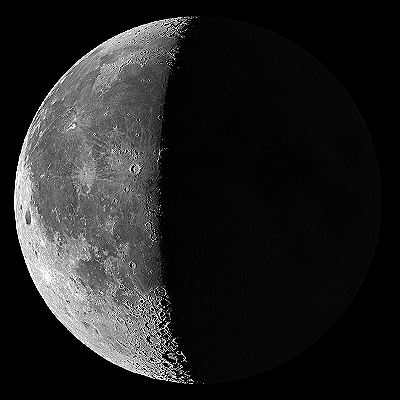

In [ ]:
image_sharper('/content/drive/MyDrive/Image processing/image8.1.jpg')
image_sharper('/content/drive/MyDrive/Image processing/image8.2.jpg')
image_sharper('/content/drive/MyDrive/Image processing/image8.3.jpg')